In [97]:
import pandas as pd

df = pd.read_csv('ViewingActivity.csv')

In [98]:
df.shape

(200, 10)

In [99]:
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)


In [100]:
## Dropping Unnecessary Columns

df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(1)

,Start Time,Duration,Title
0,2013-03-20 5:17:53,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...


In [101]:
## Converting Strings to Datetime and Timedelta in Pandas

df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [102]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [103]:
# tz_convert() can only be done on a DatetimeIndex
df = df.set_index('Start Time')
df.index = df.index.tz_convert('US/Pacific')
df = df.reset_index()  # Reset so Start Time becomes a column again
df.head(1)

,Start Time,Duration,Title
0,2013-03-19 22:17:53-07:00,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...


In [104]:
# Convert Duration to a timedelta
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, US/Pacific]
Duration                 timedelta64[ns]
Title                             object
dtype: object

In [105]:
# Filter short durations
df = df[(df['Duration'] > '0 days 00:01:00')]
df.shape

(184, 3)

In [110]:
# Remove ": Season ..." from the title
import re

df['Title'] = df['Title'].str.replace('(: Season.*)', '')
df.sample(10)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


,Start Time,Duration,Title
31,2013-03-16 12:11:50-07:00,0 days 00:19:08,The Office (U.S.)
90,2013-03-12 07:28:26-07:00,0 days 00:20:47,The Office (U.S.)
192,2013-03-02 16:44:30-08:00,0 days 00:43:56,Star Trek: Deep Space Nine
44,2013-03-15 14:11:53-07:00,0 days 00:11:48,The Office (U.S.)
4,2013-03-19 17:10:31-07:00,0 days 00:04:51,The Invisible War
112,2013-03-10 23:30:51-07:00,0 days 00:05:57,The Office (U.S.)
140,2013-03-09 13:01:10-08:00,0 days 00:18:23,The Office (U.S.)
92,2013-03-11 22:32:28-07:00,0 days 00:20:39,The Office (U.S.)
172,2013-03-05 20:53:22-08:00,0 days 00:44:44,Star Trek: Deep Space Nine
166,2013-03-06 11:34:57-08:00,0 days 00:42:51,Star Trek: Deep Space Nine


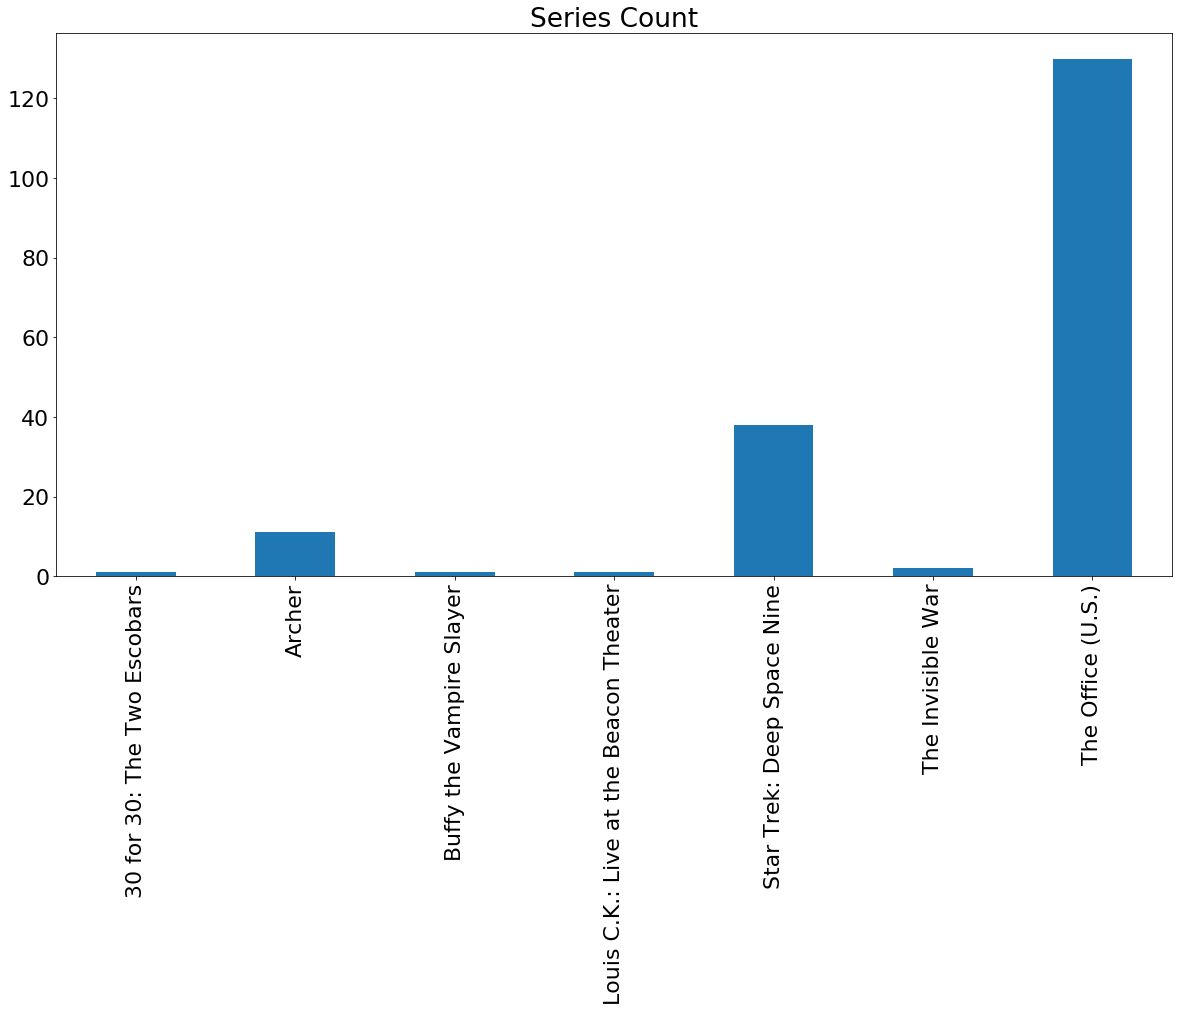

In [114]:
%matplotlib inline
import matplotlib

df['Title'] = pd.Categorical(df['Title'])
series_count = df['Title'].value_counts()
series_count = series_count.sort_index()
matplotlib.rcParams.update({'font.size': 22})

series_count.plot(kind='bar', figsize=(20,10), title='Series Count')